# <center> Bài tập Thực hành môn Khai phá Dữ liệu </center>

### **Họ và tên:** Huỳnh Nguyễn Thế Dân
### **MSSV:** 21110256
### **Lớp:** 21TTH1

##  1. Cài đặt thuật toán gom cụm phân cấp

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

url = 'https://raw.githubusercontent.com/phamdinhkhanh/datasets/cf391fa1a7babe490fdd10c088f0ca1b6d377f59/shopping-data.csv'
customer_data = pd.read_csv(url)

print(customer_data.shape)
print('------------------------------------------------')
print(customer_data.columns)
print('------------------------------------------------')
display(customer_data.describe().transpose())
print('------------------------------------------------')
display(customer_data.head())

(200, 5)
------------------------------------------------
Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


------------------------------------------------


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
intervals = [15, 20, 30, 40, 50, 60, 70]
col = customer_data['Age']

customer_data['Age Groups'] = pd.cut(x= col, bins= intervals)
print(customer_data['Age Groups'])

customer_data.groupby('Age Groups')['Age Groups'].count()

0      (15, 20]
1      (20, 30]
2      (15, 20]
3      (20, 30]
4      (30, 40]
         ...   
195    (30, 40]
196    (40, 50]
197    (30, 40]
198    (30, 40]
199    (20, 30]
Name: Age Groups, Length: 200, dtype: category
Categories (6, interval[int64, right]): [(15, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]


C:\Users\theda\AppData\Local\Temp\ipykernel_16400\2550161048.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_data.groupby('Age Groups')['Age Groups'].count()


Age Groups
(15, 20]    17
(20, 30]    45
(30, 40]    60
(40, 50]    38
(50, 60]    23
(60, 70]    17
Name: Age Groups, dtype: int64

In [5]:
customer_data_oh = pd.get_dummies(customer_data)
customer_data_oh

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male,"Age Groups_(15, 20]","Age Groups_(20, 30]","Age Groups_(30, 40]","Age Groups_(40, 50]","Age Groups_(50, 60]","Age Groups_(60, 70]"
0,1,19,15,39,False,True,True,False,False,False,False,False
1,2,21,15,81,False,True,False,True,False,False,False,False
2,3,20,16,6,True,False,True,False,False,False,False,False
3,4,23,16,77,True,False,False,True,False,False,False,False
4,5,31,17,40,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,35,120,79,True,False,False,False,True,False,False,False
196,197,45,126,28,True,False,False,False,False,True,False,False
197,198,32,126,74,False,True,False,False,True,False,False,False
198,199,32,137,18,False,True,False,False,True,False,False,False


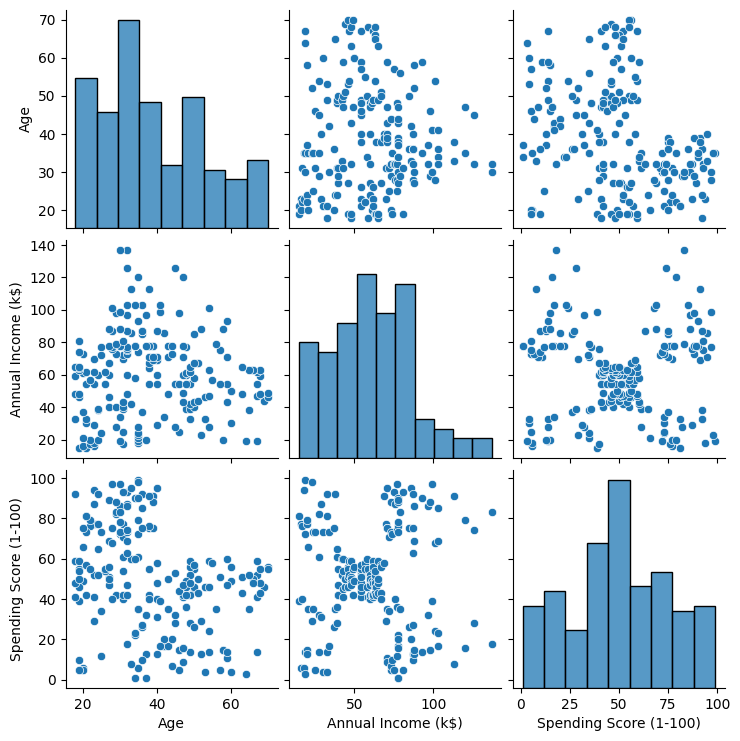

In [6]:
customer_data = customer_data.drop('CustomerID', axis= 1)
sns.pairplot(customer_data)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

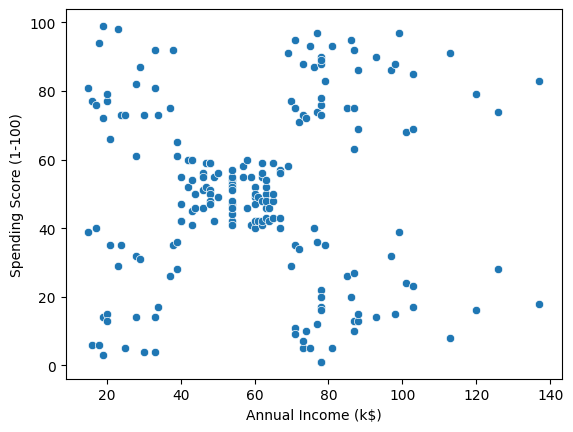

In [7]:
sns.scatterplot(x= customer_data['Annual Income (k$)'], y = customer_data['Spending Score (1-100)'])


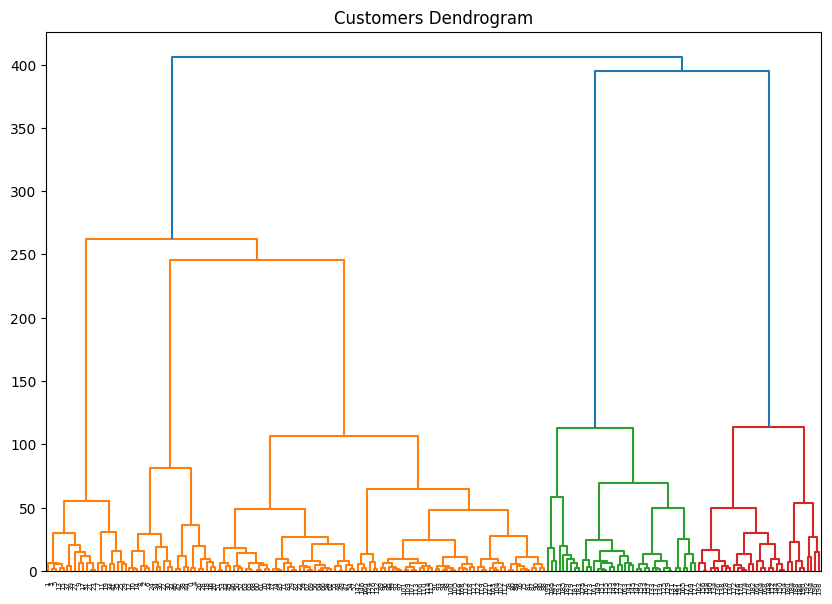

In [8]:
customer_data_oh = customer_data_oh.drop('Age', axis= 1)
customer_data_oh.shape

plt.figure(figsize=(10, 7))
plt.title('Customers Dendrogram')

selected_data = customer_data_oh.iloc[:, 1:3]
cluster = shc.linkage(selected_data, method= 'ward', metric= 'euclidean')
shc.dendrogram(Z= cluster)

plt.show()

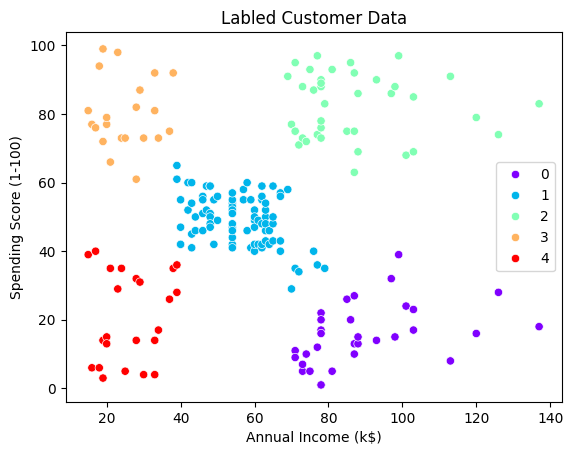

In [9]:
clustering_model = AgglomerativeClustering(n_clusters= 5, metric= 'euclidean', linkage= 'ward')
clustering_model.fit(selected_data)

clustering_model.labels_

data_lables = clustering_model.labels_

sns.scatterplot(x='Annual Income (k$)', y= 'Spending Score (1-100)', data= selected_data, hue= data_lables, palette= 'rainbow').set_title('Labled Customer Data')
plt.show()

##  2. Viết chương trình để thực thi thuật toán hierarchical sử dụng phương pháp hợp nhất Bottom-up với single-linkage, complete-linkage và average-linkage

In [11]:
def euclidean_distances(a, b):
    return (np.sqrt(np.sum(np.square(a - b))))

In [12]:
def distEuclidean_matrix(data):
    distEuclidean = np.zeros(shape=[data.shape[0],data.shape[0]])

    for i in range(distEuclidean.shape[0]):
        for j in range(distEuclidean.shape[1]):
            distEuclidean[i, j] = euclidean_distances(data[i], data[j])

    return distEuclidean

In [173]:
def hierachical(data, threshold, linkage= 'single', metric= 'euclidean'):
    
    array = np.array(data)
    
    if metric == 'euclidean':
        # Tính khoảng cách Euclidean
        distEuclidean = distEuclidean_matrix(array)

    
    # Fill khoảng cách từ 1 điểm đến chính nó bằng inf để không ảnh hưởng đến việc xử lý giá trị nhỏ nhất
    np.fill_diagonal(distEuclidean, np.inf)

    # Khởi tạo giá trị nhỏ nhất
    min_value = np.min(distEuclidean)

    if linkage == 'single':
        while min_value <= threshold and distEuclidean.shape[0] != 1:
            # Tìm giá trị nhỏ nhất
            min_value = np.min(distEuclidean)
            # Tìm chỉ số của giá trị nhỏ nhất
            min_index = np.unravel_index(np.argmin(distEuclidean), distEuclidean.shape)

            new_col = []
            for i in range(distEuclidean.shape[0]):
                if i != min_index[0] and i != min_index[1]:
                    min_val = min(distEuclidean[i, min_index[0]], distEuclidean[i, min_index[1]])
                    new_col.append(min_val)

            distEuclidean = np.delete(distEuclidean, min_index, axis=0)
            distEuclidean = np.delete(distEuclidean, min_index, axis=1)

            distEuclidean = np.insert(distEuclidean, min_index[0], np.array(new_col), axis=1)

            new_row = np.array(new_col).reshape(1,-1)
            new_row = np.insert(new_row, min_index[0], np.inf, axis=1)

            distEuclidean = np.insert(distEuclidean, min_index[0], new_row, axis=0)

            # Tìm giá trị nhỏ nhất
            min_value = np.min(distEuclidean)

    if linkage == 'complete':
        while min_value <= threshold and distEuclidean.shape[0] != 1:
            # Tìm giá trị nhỏ nhất
            min_value = np.min(distEuclidean)
            # Tìm chỉ số của giá trị nhỏ nhất
            min_index = np.unravel_index(np.argmin(distEuclidean), distEuclidean.shape)

            new_col = []
            for i in range(distEuclidean.shape[0]):
                if i != min_index[0] and i != min_index[1]:
                    max_val = max(distEuclidean[i, min_index[0]], distEuclidean[i, min_index[1]])
                    new_col.append(max_val)

            distEuclidean = np.delete(distEuclidean, min_index, axis=0)
            distEuclidean = np.delete(distEuclidean, min_index, axis=1)

            distEuclidean = np.insert(distEuclidean, min_index[0], np.array(new_col), axis=1)

            new_row = np.array(new_col).reshape(1,-1)
            new_row = np.insert(new_row, min_index[0], np.inf, axis=1)

            distEuclidean = np.insert(distEuclidean, min_index[0], new_row, axis=0)

            # Tìm giá trị nhỏ nhất
            min_value = np.min(distEuclidean)

    if linkage == 'average':
        # Khởi tạo ma trận check hệ số cần nhân lên để tính toán lại giá trị trung bình
        check_average = np.eye(distEuclidean.shape[0])
        
        while min_value <= threshold and distEuclidean.shape[0] != 1:

            # Tìm chỉ số của giá trị nhỏ nhất
            min_index = np.unravel_index(np.argmin(distEuclidean), distEuclidean.shape)

            new_col = []
            for i in range(distEuclidean.shape[0]):
                if i != min_index[0] and i != min_index[1]:
                    average_val = (distEuclidean[i, min_index[0]]*check_average[min_index[0],min_index[0]] + distEuclidean[i, min_index[1]]*check_average[min_index[1],min_index[1]])/(check_average[min_index[0],min_index[0]]+check_average[min_index[1],min_index[1]])
                    new_col.append(average_val)

            distEuclidean = np.delete(distEuclidean, min_index, axis=0)
            distEuclidean = np.delete(distEuclidean, min_index, axis=1)

            check_average[min_index[0],min_index[0]] = check_average[min_index[0],min_index[0]] + check_average[min_index[1],min_index[1]]
            check_average = np.delete(check_average, min_index[1], axis= 0)
            check_average = np.delete(check_average, min_index[1], axis= 1)

            distEuclidean = np.insert(distEuclidean, min_index[0], np.array(new_col), axis=1)

            new_row = np.array(new_col).reshape(1,-1)
            new_row = np.insert(new_row, min_index[0], np.inf, axis=1)

            distEuclidean = np.insert(distEuclidean, min_index[0], new_row, axis=0)

            # Tìm giá trị nhỏ nhất
            min_value = np.min(distEuclidean)

    
    return pd.DataFrame(distEuclidean)

In [87]:
data = np.array([[1, 1], [2,3], [3,5], [4,5], [6,6], [7,5]])

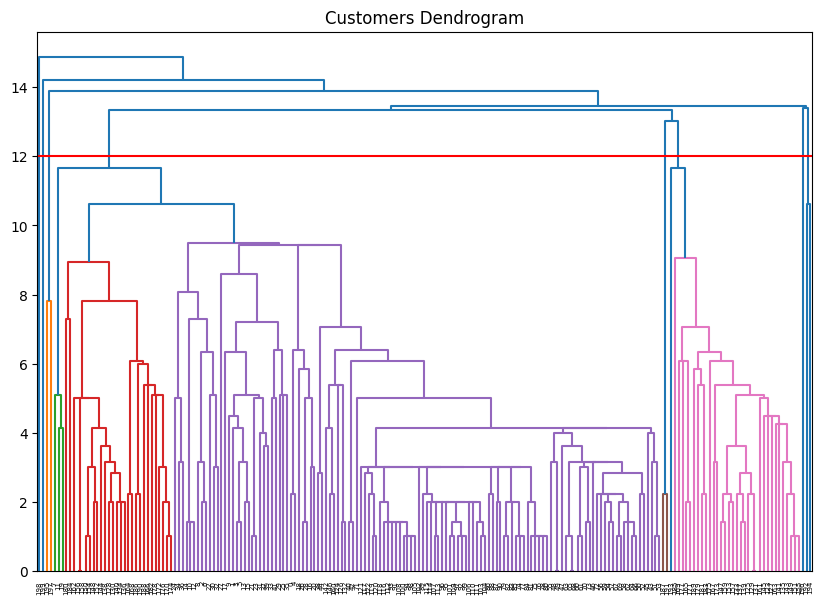

In [188]:
plt.figure(figsize=(10, 7))
plt.title('Customers Dendrogram')

selected_data = customer_data_oh.iloc[:, 1:3]
cluster = shc.linkage(selected_data, method= 'single', metric= 'euclidean')
shc.dendrogram(Z= cluster)

plt.axhline(y = 12, color = 'r', linestyle = '-')

plt.show()

In [189]:
hierachical(selected_data, threshold=12, linkage= 'single', metric= 'euclidean')

,0,1,2,3,4,5,6,7
0,inf,13.341664,29.068884,13.453624,44.204072,23.537205,34.014703,58.137767
1,13.341664,inf,13.038405,57.428216,13.892444,52.402290,67.268120,25.298221
2,29.068884,13.038405,inf,55.362442,19.723083,47.010637,61.294372,36.769553
3,13.453624,57.428216,55.362442,inf,58.309519,13.416408,17.117243,69.123079
4,44.204072,13.892444,19.723083,58.309519,inf,46.000000,57.070132,14.212670
5,23.537205,52.402290,47.010637,13.416408,46.000000,inf,14.866069,56.089215
6,34.014703,67.268120,61.294372,17.117243,57.070132,14.866069,inf,65.000000
7,58.137767,25.298221,36.769553,69.123079,14.212670,56.089215,65.000000,inf


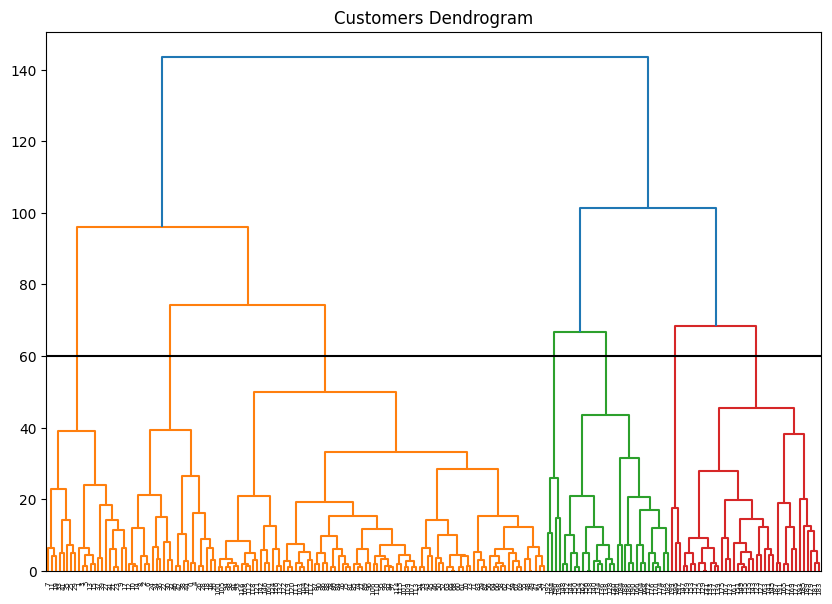

In [194]:
plt.figure(figsize=(10, 7))
plt.title('Customers Dendrogram')

selected_data = customer_data_oh.iloc[:, 1:3]
cluster = shc.linkage(selected_data, method= 'complete', metric= 'euclidean')
shc.dendrogram(Z= cluster)

plt.axhline(y = 60, color = 'black', linestyle = '-')

plt.show()

In [192]:
hierachical(selected_data, threshold=60, linkage= 'complete', metric= 'euclidean')

,0,1,2,3,4,5,6
0,inf,96.026038,74.330344,128.972865,90.708324,123.794184,143.422453
1,96.026038,inf,87.726849,98.508883,117.388245,143.125819,122.016392
2,74.330344,87.726849,inf,87.920419,80.000000,108.687626,105.309069
3,128.972865,98.508883,87.920419,inf,98.270036,101.414989,68.468971
4,90.708324,117.388245,80.000000,98.270036,inf,66.610810,101.019800
5,123.794184,143.125819,108.687626,101.414989,66.610810,inf,78.746428
6,143.422453,122.016392,105.309069,68.468971,101.019800,78.746428,inf


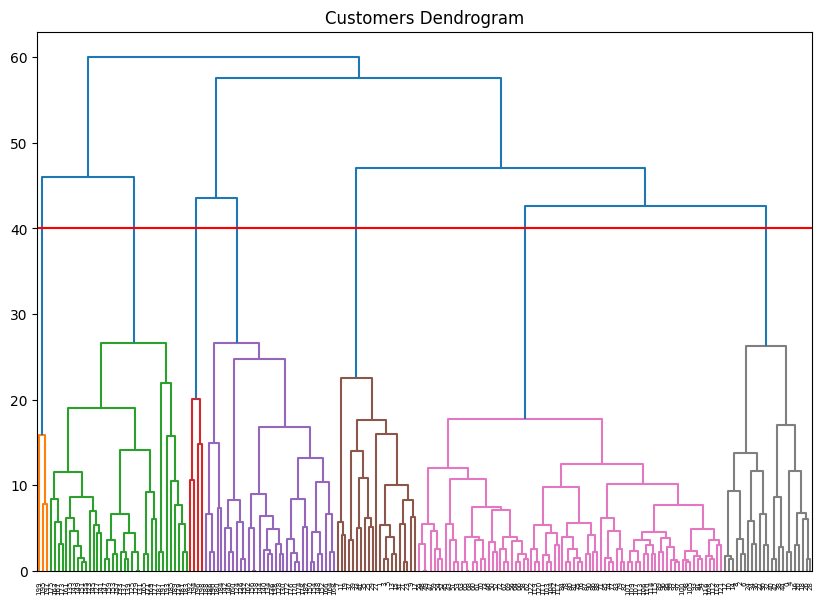

In [198]:
plt.figure(figsize=(10, 7))
plt.title('Customers Dendrogram')

selected_data = customer_data_oh.iloc[:, 1:3]
cluster = shc.linkage(selected_data, method= 'average', metric= 'euclidean')
shc.dendrogram(Z= cluster)

plt.axhline(y = 40, color = 'r', linestyle = '-')

plt.show()

In [200]:
hierachical(selected_data, threshold=40, linkage= 'average', metric= 'euclidean')

,0,1,2,3,4,5,6
0,inf,60.136068,42.624281,84.885199,58.926975,98.861403,117.230725
1,60.136068,inf,43.294630,59.694564,85.244484,117.774780,103.133735
2,42.624281,43.294630,inf,45.045626,44.250615,77.689875,78.951278
3,84.885199,59.694564,45.045626,inf,65.450942,78.159189,46.068658
4,58.926975,85.244484,44.250615,65.450942,inf,43.575768,75.747405
5,98.861403,117.774780,77.689875,78.159189,43.575768,inf,62.218918
6,117.230725,103.133735,78.951278,46.068658,75.747405,62.218918,inf
